# Customer Analysis Round 2

### Importing files

In [2]:
import pandas as pd
import numpy as np

In [3]:
mca_data = pd.read_csv('../lab-customer-analysis-round-3/files_for_lab/csv_files/marketing_customer_analysis.csv')

### DF shape

In [4]:
#Showing the dataframe shape.
print(mca_data.shape)
mca_data.head()

(9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Header names

In [5]:
#Standardizing header names with lower cases and underscores.
mca_data.columns= mca_data.columns.str.lower()
mca_data.columns = mca_data.columns.str.replace(" ", "_")
mca_data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
#Checking data types for all the columns in a dataframe
mca_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

### Which columns are numerical?

###### "customer_lifetime_value", "income", "monthly_premium_auto", "months_since_last_claim", "months_since_policy_inception", "number_of_open_complaints", "number_of_policies", "total_claim_amount" are numerical columns.

### Which columns are categorical?

"customer", "state", "responce", "coverage", "education", "effective_to_date", "employmentstatus", "gender", "location_code", "marital_status", "policy_type", "policy", "renew_offer_type", "sales_channel", "vehicle_class", "vehicle_size", "vehicle_type" 

### NaN values.

In [7]:
round(mca_data.isna().sum()/len(mca_data),4)*100

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

There are 7 variables with some number of missing values.

1.For the numerical variables ("months since last claim" amd "number of open complaints") I will use the mean of the column.

2.For the categorical variables like "state", "response", "vehicle_class" and "vehicle_size" I will use the mode.

3.And I will drop the column "vehicle type" because the % of missing values is more than 50%, and this information might be retrieved from the other columns.

Missing values for numerical columns

In [8]:
# Calculating mean for "months since last claim" and filling NaNs with this value
mean_months_since_last_claim = mca_data['months_since_last_claim'].mean()
print("Mean months since last claim is:",mean_months_since_last_claim)
mca_data['months_since_last_claim'] = mca_data['months_since_last_claim'].fillna(mean_months_since_last_claim)

# Calculating mean for "months since last claim" and filling NaNs with this value
mean_number_of_open_complaints = mca_data['number_of_open_complaints'].mean()
print("Mean number of open complaints is:",mean_number_of_open_complaints)
mca_data['number_of_open_complaints'] = mca_data['number_of_open_complaints'].fillna(mean_number_of_open_complaints)

Mean months since last claim is: 15.097000218962119
Mean number of open complaints is: 0.38438800087584846


Missing values for categorical columns

In [9]:
# Defining the mode for the categorical columns
print(mca_data["state"].mode()[0])
print(mca_data["response"].mode()[0])
print(mca_data["vehicle_class"].mode()[0])
print(mca_data["vehicle_size"].mode()[0])

California
No
Four-Door Car
Medsize


In [10]:
# Filling NaNs with the most popular value of the column
mca_data['state'] = mca_data['state'].fillna('California')
mca_data['response'] = mca_data['response'].fillna('No')
mca_data['vehicle_class'] = mca_data['vehicle_class'].fillna('Four-Door Car')
mca_data['vehicle_size'] = mca_data['vehicle_size'].fillna('Medsize')

Dropping "vehicle type" column

In [68]:
mca_data = mca_data.drop(["vehicle_type"], axis=1)

In [ ]:
# Double-checking missing values presence.
round(mca_data.isna().sum()/len(mca_data),4)*100

### Datetime formating

In [ ]:
#Datetime format - Extract the months from the dataset and store in a separate column. 
#Then filter the data to show only the information for the first quarter , ie. January, February and March. #
#Hint: If data from March does not exist, consider only January and February.

In [ ]:
import datetime

# changing dtype of "effective to date" column to datetime. And creating a new column to extract the month number.
mca_data["effective_to_date"] = pd.to_datetime(mca_data['effective_to_date'], errors='coerce')
mca_data["effective_to_month"] = mca_data['effective_to_date'].dt.month

# checking values for the new column
mca_data['effective_to_month'].value_counts()

We only have January and February in the dataset, therefore we do not need to filter it - it already contains only Q1

### BONUS: Put all the previously mentioned data transformations into a function.

In [ ]:
# Here is a function to standardize column names, but I can´t find a way to briefly put all the other 
# data transformations in a function

def data_transformation(mca_data):
    mca_data.columns = mca_data.columns.str.lower().str.replace(' ', '_')
    return mca_data
    
mca_data = data_transformation(mca_data)
print(mca_data.columns)

# Customer Analysis Round 3

### Show DataFrame info.

In [67]:
mca_data.info()
mca_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,tca_level,income_level
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,medium,medium
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,high,no income
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,high,medium
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,medium,no income
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,very low,medium


### Describe DataFrame.

In [19]:
mca_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer,9134,9134,BU79786,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,9134,5,California,3150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_lifetime_value,9134.0,NaN,NaN,NaN,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
response,9134,2,No,7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,9134,3,Basic,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,9134,5,Bachelor,2748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective_to_date,9134,59,1/10/11,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employmentstatus,9134,5,Employed,5698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,9134,2,F,4658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,9134.0,NaN,NaN,NaN,37657.380009,30379.904734,0.0,0.0,33889.5,62320.0,99981.0


## Plots

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### Show a plot of the total number of responses.

[Text(0.5, 1.0, 'Total number of responses by type')]

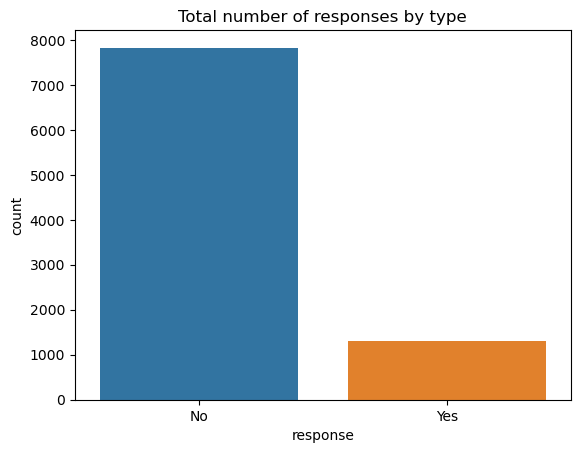

In [13]:
sns.countplot(data=mca_data, x="response").set(title='Total number of responses by type')

### Show a plot of the response rate by the sales channel.

[Text(0.5, 1.0, 'Total number of responses by sales channel')]

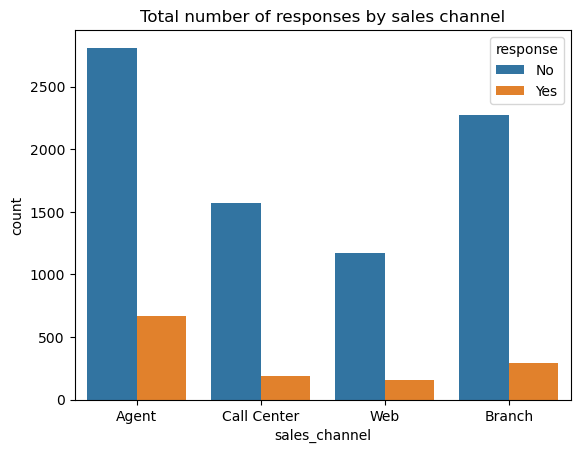

In [62]:
sns.countplot(data=mca_data, x="sales_channel", hue="response").set(title='Total number of responses by sales channel')


### Show a plot of the response rate by the total claim amount and income

I think that for the next 2 plots I need to create categorical extra-columns with the ranking for the requested variables.

To understand the variables "total_claim_amount" and "income" I will describe the dataset.

In [41]:
mca_data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


I will use the values from 25%, 50% and 75% to create the ranking for these variables.

### Show a plot of the response rate by total claim amount.

In [58]:
# Creating a column with the grading for total_claim_amount

condition = [
    (mca_data["total_claim_amount"]<272),
    (mca_data["total_claim_amount"]>=272) & (mca_data["total_claim_amount"]<384),
    (mca_data["total_claim_amount"]>=384) & (mca_data["total_claim_amount"]<548),
    (mca_data["total_claim_amount"]>=548)
]

tca_level =["very low", "low", "medium", "high"]
mca_data['tca_level'] = np.select(condition, tca_level)        

[Text(0.5, 1.0, 'Total number of responses by total claim amount')]

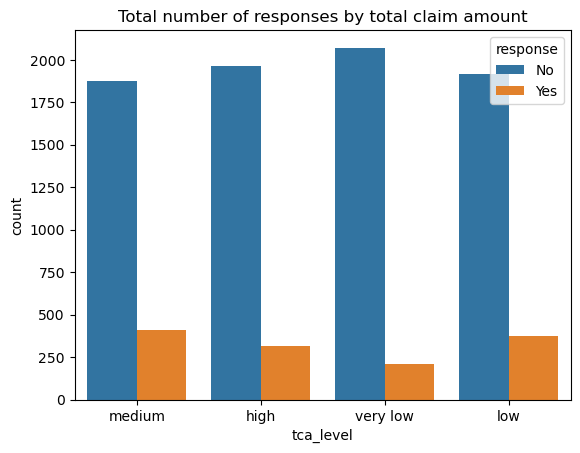

In [63]:
sns.countplot(data=mca_data, x="tca_level", hue="response").set(title='Total number of responses by total claim amount')

### Show a plot of the response rate by income.

In [60]:
# Creating a column with the grading for income

condition1 = [
    (mca_data["income"]<=0),
    (mca_data["income"]>0) & (mca_data["income"]<=33890),
    (mca_data["income"]>33890) & (mca_data["income"]<=62320),
    (mca_data["income"]>62320)
]

income_level =["no income", "low", "medium", "high"]
mca_data['income_level'] = np.select(condition1, income_level)  

[Text(0.5, 1.0, 'Total number of responses by income')]

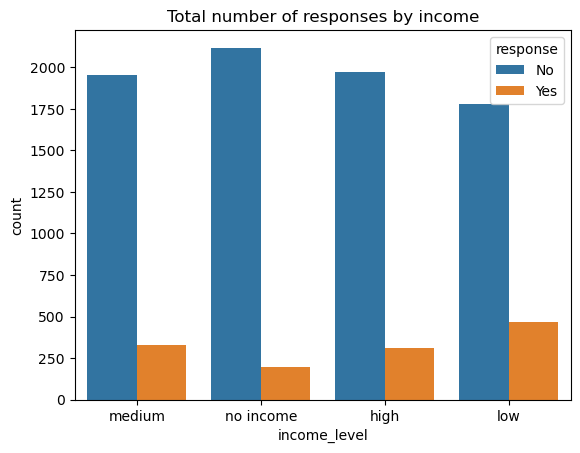

In [64]:
sns.countplot(data=mca_data, x="income_level", hue="response").set(title='Total number of responses by income')